In [1]:
from astropy.io import fits
from matplotlib import pyplot as plt
% matplotlib inline
from astropy.stats import sigma_clip
from astropy.stats import biweight_midvariance as bimv
from astropy.stats import biweight_location as bil
import numpy as np
import numpy.ma as ma

In [2]:
def poi(file,field_sigma=3,iterations=5,column_sigma=5):
    im = fits.getdata(file)
    scim = sigma_clip(im, sigma=field_sigma, iters=iterations)
    
    for i in range(1052):
        mean=bil(scim[:,i])
        sig=np.sqrt(bimv(scim[:,i]))
        out=ma.where(scim[:,i]>(mean+column_sigma*sig))[0]
        if out.size:
            for j in range(len(out)):
                print((i+1,out[j]+1))

In [3]:
poi("Fepdsses20180219T070215.4_084_sci_L.fits")

/home/rfoster/.local/lib/python3.5/site-packages/astropy/stats/biweight.py:362: RuntimeWarning: invalid value encountered in double_scalars
  return n * f1 / f2


(20, 175)
(43, 3)
(44, 3)
(50, 196)
(51, 196)
(54, 52)
(55, 52)
(58, 127)
(58, 142)
(59, 142)
(62, 146)
(63, 146)
(64, 146)
(64, 175)
(67, 175)
(84, 217)
(85, 217)
(86, 154)
(96, 94)
(97, 94)
(100, 84)
(100, 172)
(103, 27)
(121, 221)
(122, 221)
(136, 214)
(145, 51)
(146, 51)
(152, 99)
(158, 154)
(159, 206)
(160, 88)
(160, 206)
(256, 223)
(262, 33)
(279, 119)
(323, 133)
(339, 144)
(340, 43)
(365, 149)
(371, 138)
(373, 211)
(385, 154)
(396, 68)
(403, 150)
(415, 93)
(416, 40)
(416, 211)
(417, 40)
(418, 211)
(420, 116)
(444, 12)
(511, 193)
(517, 36)
(526, 139)
(575, 155)
(575, 160)
(584, 112)
(592, 121)
(599, 10)
(600, 10)
(603, 84)
(607, 146)
(608, 146)
(633, 130)
(634, 130)
(640, 7)
(644, 198)
(658, 206)
(662, 132)
(666, 215)
(667, 215)
(672, 75)
(673, 75)
(683, 9)
(684, 9)
(691, 100)
(692, 17)
(692, 100)
(730, 90)
(751, 120)
(754, 73)
(755, 73)
(762, 63)
(783, 87)
(793, 49)
(799, 75)
(815, 7)
(822, 66)
(852, 192)
(855, 92)
(856, 92)
(857, 92)
(882, 170)
(885, 170)
(887, 16)
(888, 177)
(

In [13]:
hdulist=fits.open('Fepdsses20180219T070215.4_074_sci_L.fits')
hdulist.info()

Filename: Fepdsses20180219T070215.4_074_sci_L.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     178   (1052, 224)   float32   


In [4]:
sigma_clip(fits.getdata("Fepdsses20180219T070215.4_084_sci_L.fits"))

masked_array(data =
 [[50.593353271484375 51.281089782714844 51.11017990112305 ...,
  199.38771057128906 205.89305114746094 185.87200927734375]
 [47.589908599853516 39.08842849731445 55.256893157958984 ...,
  203.37203979492188 174.2888641357422 195.90988159179688]
 [46.1401252746582 58.01241683959961 43.99723815917969 ...,
  170.28915405273438 163.661376953125 165.2137908935547]
 ..., 
 [-- -- 43.42656326293945 ..., -- -- --]
 [50.529685974121094 52.70515441894531 40.46371841430664 ..., -- -- --]
 [40.76495361328125 50.553001403808594 56.08503723144531 ..., -- -- --]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [ True  True False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]],
       fill_value = 1e+20)

In [8]:
sig=sigma_clip(fits.getdata("Fepdsses20180219T070215.4_084_sci_L.fits"))
out=np.mean(sig[],axis=1)

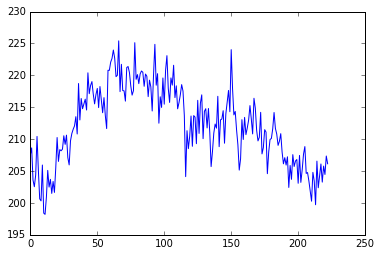

In [9]:
plt.plot(out)